<a href="https://colab.research.google.com/github/tiwariadarsh07/Machine-Learning-Projects/blob/main/Weather%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv("weatherAUS.csv")

In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.dropna(subset= (["RainToday","RainTomorrow"]), inplace = True)

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [ ]:
## To check no of unique values
df.Location.nunique()

49

In [ ]:
## To count no of each value
df.Location.value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


In [ ]:
px.histogram(df, 
              x = 'Location',
             title = 'Location Vs Rainy Days',
             color = 'RainToday')

In [ ]:
px.histogram(df,
             x = "RainTomorrow",
             color = "RainToday",
             title = "Rain Tomorrow vs Rain Today")

In [ ]:
px.histogram(df,
             x = "Temp3pm",
             title = 'temprature at 3 pm vs Rain Tommorow',
             color = 'RainTomorrow')

In [ ]:
px.scatter(df.sample(4000),
          x = 'MinTemp',
          y = 'MaxTemp',
          title ="Min Temp vs Max Temp",
          color = 'RainToday' )

In [ ]:
px.strip(df.sample(2000),
         title = 'Temp 3 pm vs humidity 3 pm',
         x = 'Temp3pm',
         y = 'Humidity3pm',
         color= 'RainTomorrow')

Train, Test and Validation 

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
''' feature = df.iloc[:,0:22]
feature.head() '''

' feature = df.iloc[:,0:22]\nfeature.head() '

In [ ]:
''' label = df.RainTomorrow
label.head()'''

' label = df.RainTomorrow\nlabel.head()'

In [ ]:
''' train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)
train_df , validation_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42) '''

' train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)\ntrain_df , validation_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42) '

In [ ]:
'''print("train_df Shape: ", train_df.shape)
print("validation_df Shape: ", validation_df.shape)
print("test_df Shape: ", test_df.shape)'''

'print("train_df Shape: ", train_df.shape)\nprint("validation_df Shape: ", validation_df.shape)\nprint("test_df Shape: ", test_df.shape)'

Q: How to split Time series data ??
As, we don't want to use future data to predict past data, this is something we should be concerned about during splitting of the data

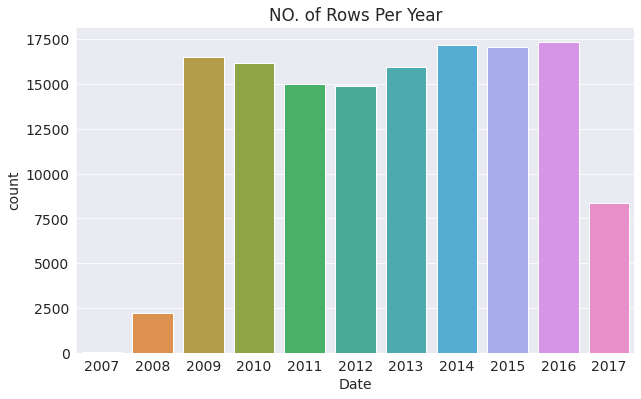

In [ ]:
plt.title("NO. of Rows Per Year")
sns.countplot(x= pd.to_datetime(df.Date).dt.year)

The same thing we gonna do here

In [ ]:
year = pd.to_datetime(df.Date).dt.year
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int64

In [ ]:
train_df = df[year < 2015]
validation_df = df[year == 2015]
test_df = df[year > 2015]

In [ ]:
print("train_df Shape: ", train_df.shape)
print("validation_df Shape: ", validation_df.shape)
print("test_df Shape: ", test_df.shape)

train_df Shape:  (97988, 23)
validation_df Shape:  (17089, 23)
test_df Shape:  (25710, 23)


In [ ]:
print(year<2015)

0          True
1          True
2          True
3          True
4          True
          ...  
145454    False
145455    False
145456    False
145457    False
145458    False
Name: Date, Length: 140787, dtype: bool


In [ ]:
features = df.iloc[:,1:-1]

In [ ]:
features.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   
2           46.0          W        WSW  ...          26.0         38.0   
3           24.0         SE          E  ...           9.0         45.0   
4           41.0        ENE         NW  ...          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  
2     23.2         No  
3     26.5         No  
4     29.7         No  

[5 rows x 21 columns]

In [ ]:
labels = df['RainTomorrow']

In [ ]:
labels.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [ ]:
features.describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [ ]:
features.nunique()

Location          49
MinTemp          389
MaxTemp          503
Rainfall         679
Evaporation      355
Sunshine         145
WindGustDir       16
WindGustSpeed     67
WindDir9am        16
WindDir3pm        16
WindSpeed9am      43
WindSpeed3pm      44
Humidity9am      101
Humidity3pm      101
Pressure9am      545
Pressure3pm      548
Cloud9am          10
Cloud3pm          10
Temp9am          440
Temp3pm          500
RainToday          2
dtype: int64

**Imputing Numerical Methods**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
numeric_col = ['MinTemp','MaxTemp',	'Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [ ]:
df[numeric_col].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN       NaN     17.2     24.3  
2       1008.7       NaN       2.0     21.0     23.2  
3       1012.8       NaN       NaN     18.1     26.5  
4       1006.0       7.0       8.0     17.8     29.7

In [ ]:
imputer.fit(df[numeric_col])

SimpleImputer()

In [ ]:
print(list(imputer.statistics_))

[12.18482386562048, 23.235120301822324, 2.349974074310839, 5.472515506887154, 7.630539861047281, 39.97051988882308, 13.990496092519967, 18.631140782316862, 68.82683277087672, 51.44928834695453, 1017.6545771543717, 1015.2579625879797, 4.431160817585808, 4.499250233195188, 16.98706638787991, 21.69318269001107]


In [ ]:
train_df[numeric_col] = imputer.transform(train_df[numeric_col])
validation_df[numeric_col]= imputer.transform(validation_df[numeric_col])
test_df[numeric_col] = imputer.transform(test_df[numeric_col])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
train_df[numeric_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling the features

In [ ]:
train_df[numeric_col].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.472516   7.63054           44.0   
1      7.4     25.1       0.0     5.472516   7.63054           44.0   
2     12.9     25.7       0.0     5.472516   7.63054           46.0   
3      9.2     28.0       0.0     5.472516   7.63054           24.0   
4     17.5     32.3       1.0     5.472516   7.63054           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1  8.000000   4.49925     16.9     21.8  
1       1007.8  4.431161   4.49925     17.2     24.3  
2       1008.7  4.431161   2.00000     21.0     23.2  
3       1012.8  4.431161   4.49925     18.1     26.5  
4       1006.0  7.000000   8.00000     17.8     29.7

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## to get help
?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_col])

MinMaxScaler()

In [ ]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [ ]:
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7])

In [ ]:
train_df[numeric_col] = scaler.transform(train_df[numeric_col])
validation_df[numeric_col]= scaler.transform(validation_df[numeric_col])
test_df[numeric_col] = scaler.transform(test_df[numeric_col])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
train_df.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1  2008-12-02   Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2  2008-12-03   Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3  2008-12-04   Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4  2008-12-05   Albury  0.613208  0.701323  0.002695     0.037741  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W       0.294574          W  ...        0.71         0.22   
1         WNW       0.294574        NNW  ...        0.44         0.25   
2         WSW       0.310078          W  ...        0.38         0.30   
3          NE       0.139535         SE  ...        0.45         0.16   
4           W       0.271318        ENE  ...        0.82         0.33   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0     0.449587       0.4800  0.888889  0.499917  0.508439  0.522073   
1     0.497521       0.4912  0.492351  0.499917  0.514768  0.570058   
2     0.447934       0.5056  0.492351  0.222222  0.594937  0.548944   
3     0.613223       0.5712  0.492351  0.499917  0.533755  0.612284   
4     0.500826       0.4624  0.777778  0.888889  0.527426  0.673704   

   RainToday  RainTomorrow  
0         No            No  
1         No            No  
2         No            No  
3         No            No  
4         No            No  

[5 rows x 23 columns]

## Ecncoding the Categorical Data

In [ ]:
categorical_col = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [ ]:
train_df.shape

(97988, 23)

In [ ]:
train_df[categorical_col].head()

Location WindGustDir WindDir9am WindDir3pm RainToday
0   Albury           W          W        WNW        No
1   Albury         WNW        NNW        WSW        No
2   Albury         WSW          W        WSW        No
3   Albury          NE         SE          E        No
4   Albury           W        ENE         NW        No

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse= False, handle_unknown = 'ignore')

In [ ]:
encoder.fit(df[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_col))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_col])
validation_df[encoded_cols] = encoder.transform(validation_df[categorical_col])
test_df[encoded_cols] = encoder.transform(test_df[categorical_col])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
train_df.head()

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1  2008-12-02   Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2  2008-12-03   Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3  2008-12-04   Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4  2008-12-05   Albury  0.613208  0.701323  0.002695     0.037741  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  WindDir3pm_SSE  \
0           W       0.294574          W  ...           0.0             0.0   
1         WNW       0.294574        NNW  ...           0.0             0.0   
2         WSW       0.310078          W  ...           0.0             0.0   
3          NE       0.139535         SE  ...           0.0             0.0   
4           W       0.271318        ENE  ...           0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             1.0   
1             0.0            0.0           0.0             0.0   
2             0.0            0.0           0.0             0.0   
3             0.0            0.0           0.0             0.0   
4             0.0            0.0           0.0             0.0   

   WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0           1.0            0.0  
1             1.0             0.0           1.0            0.0  
2             1.0             0.0           1.0            0.0  
3             0.0             0.0           1.0            0.0  
4             0.0             0.0           1.0            0.0  

[5 rows x 125 columns]

## Dropping the categorical columns after encoding

In [ ]:
train_df.drop(categorical_col, axis=1, inplace= True)
validation_df.drop(categorical_col, axis=1, inplace= True)
test_df.drop(categorical_col, axis=1, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_y =train_df.RainTomorrow
validation_y = validation_df.RainTomorrow
test_y = test_df.RainTomorrow 

In [ ]:
train_x = train_df.drop(['RainTomorrow'],axis = 1)
validation_x = validation_df.drop(['RainTomorrow'], axis=1)
test_x = test_df.drop(['RainTomorrow'], axis=1)

In [ ]:
print("Train x", train_x.shape)
print("Train y", train_y.shape)
print("Validation x", validation_x.shape)
print("Validation y" ,validation_y.shape)
print("Test x", test_x.shape)
print("Test x", test_y.shape)

Train x (97988, 119)
Train y (97988,)
Validation x (17089, 119)
Validation y (17089,)
Test x (25710, 119)
Test x (25710,)


In [ ]:
model = LogisticRegression(solver = 'liblinear')

In [ ]:
train_x.drop(["Date"], axis = 1 , inplace = True)
validation_x.drop(["Date"], axis = 1 , inplace = True)
test_x.drop(["Date"], axis = 1 , inplace = True)

In [ ]:
%%time 
model.fit(train_x, train_y)

CPU times: user 1.32 s, sys: 19.9 ms, total: 1.34 s
Wall time: 1.34 s


LogisticRegression(solver='liblinear')

In [ ]:
print(model.coef_.tolist())

[[0.8986297930345342, -2.8799204060649943, 3.1627757399992764, 0.8542333261963998, -1.671394164561986, 6.764390158247094, -0.9423158858733789, -1.4284258683428768, 0.3228997608393862, 5.995318372268631, 5.463846784453185, -9.17679795785107, -0.16230333435253397, 1.2876575040619256, 0.4747186064170006, 2.0214328984948513, 0.6016519028215679, -0.552477104469191, 0.47814423119684174, 0.0076658073824705615, 0.34681523049757107, -0.35227929992271934, 0.17971215004683533, 0.44048763345826203, -0.01398015208073661, 0.028943135225948075, 0.2581472778649235, -0.021207662838966575, -0.042792369348315706, -0.48314018877133696, -0.13756446769655933, -0.5760632042270655, -0.7875166742656966, -0.255401526390966, -0.32888762445550657, -0.5690081830628351, 0.08182990879409187, 0.01338244162954458, 0.06412637314153144, -0.9020547728556427, -0.44432692411493857, 0.008520520479860539, -0.4606123201969221, -0.46551901921036964, -0.06950134886943393, 0.1911583743352608, 0.45047746322189247, 0.6081203012953

In [ ]:
print(train_x.columns.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
weights_df  = pd.DataFrame({"Columns": train_x.columns.tolist(),
                        "Weights":  model.coef_.tolist()[0]
})

In [ ]:
weights_df.tail()

Columns   Weights
113  WindDir3pm_WNW -0.033499
114  WindDir3pm_WSW -0.275977
115  WindDir3pm_nan  0.074933
116    RainToday_No -1.473518
117   RainToday_Yes -0.976037

In [ ]:
model.intercept_

array([-2.44955509])

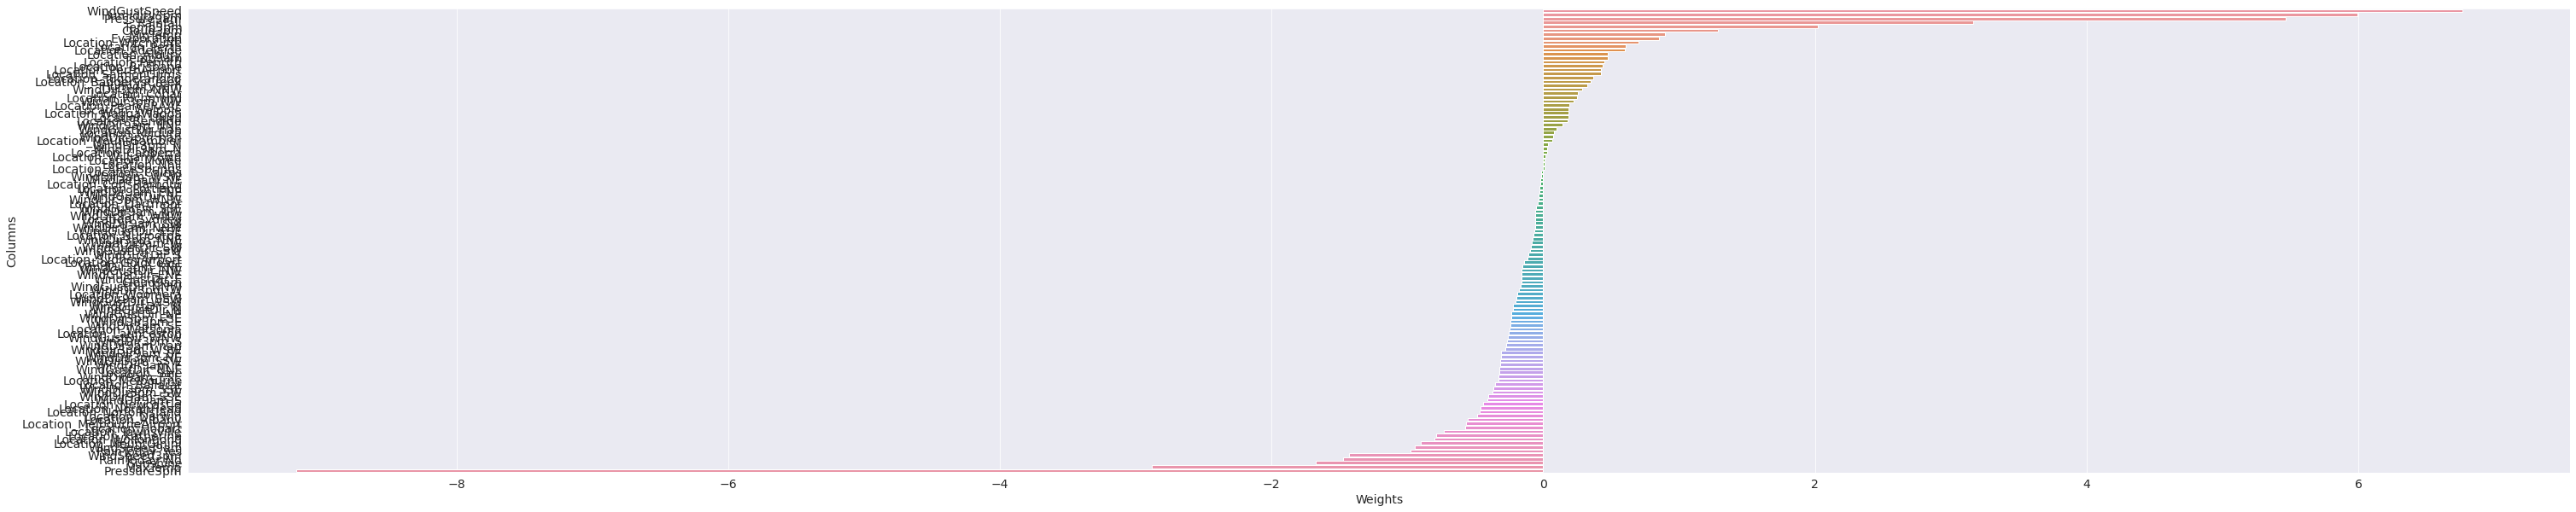

In [ ]:
plt.rcParams["figure.figsize"] = (50,10)
sns.barplot(data = weights_df.sort_values("Weights",ascending = False), y ='Columns', x = 'Weights')

## Prediction Using Model 

In [ ]:
train_prediction = model.predict(train_x)
train_prediction

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_y

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [ ]:
accuracy_score(train_y, train_prediction)

0.8519206433440829

## We can get probabilitic values for data as well 

In [ ]:
train_prob = model.predict_proba(train_x)
train_prob

array([[0.94401112, 0.05598888],
       [0.94074168, 0.05925832],
       [0.96093614, 0.03906386],
       ...,
       [0.98749119, 0.01250881],
       [0.98334685, 0.01665315],
       [0.87453486, 0.12546514]])

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

## confusion Metrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_y, train_prediction, normalize ='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [ ]:
def predict_n_plt(inputs,targets, name=" "):
  predict = model.predict(inputs)
  accuracy = accuracy_score(targets, predict)
  print("Accuracy: ", accuracy*100)
  print("\n")
  cf = confusion_matrix(targets,predict, normalize = 'true')
  plt.figure(figsize =(10,4))
  sns.heatmap(cf, annot= True)
  plt.xlabel("Target")
  plt.ylabel("Prediction")
  plt.title("Confusion Matrix")
  plt.show()
  print("\n")
  return predict

**For Train Data**

Accuracy: 
 85.19206433440829


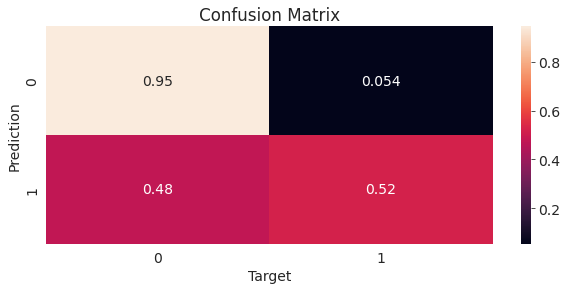

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
predict_n_plt(train_x,train_y)

**For Validation Data**

Accuracy: 
 85.39996488969513


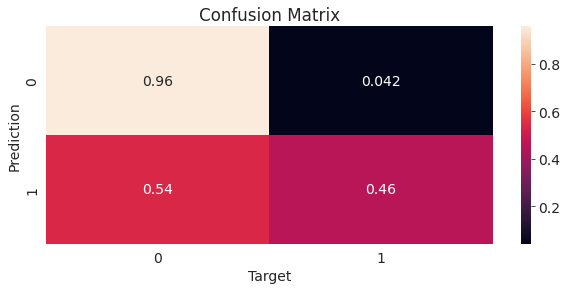

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
predict_n_plt(validation_x,validation_y)

Accuracy: 
 84.20070011668611


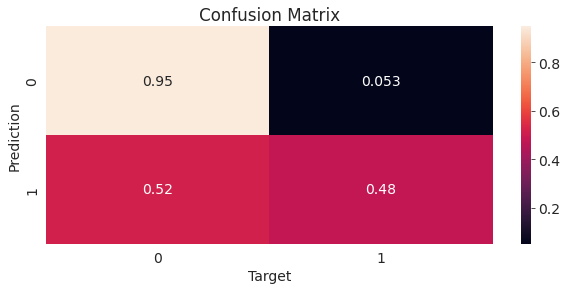

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
predict_n_plt(test_x,test_y)

## Saving The Model 

In [ ]:
import joblib

In [ ]:
aussie_Weather = {
    "Model" : model,
    'Imputer' : imputer,
    "Scaler" : scaler,
    'Encoder' : encoder,
     "Catergorical_col" : categorical_col,
     "Numerical_col" : numeric_col
}

In [ ]:
joblib.dump(aussie_Weather,"aussie_rain.joblib")

['aussie_rain.joblib']